# Weekend Workshop: Accessing data on the web

---
This workshop is to practice web scraping and dealing with data from APIs using Jupyter Notebooks.

---


## Section 1
## Trump tweets, JSON edition

We first look at some of Donald Trump's tweets that have been conveniently packaged into a CSV file to open as a spreadsheet. The dataset we used ended in summer 2016. What if we wanted to analyse more recent tweets? We could do this by registering for access to [Twitter's API](https://dev.twitter.com/rest/public) and downloading the data directly using one of the [libraries](https://dev.twitter.com/resources/twitter-libraries) that Python users have developed for accessing the API. 

We won't register for the API today. Instead, we'll use the data maintained by Github user [bpb27](https://github.com/bpb27/trump_tweet_data_archive). 

The data that we'll use has been cleaned and condensed, but resembles the output from the Twitter API. Instead of CSV, the API gives data in JSON format. We've included the file `condensed_2016.json` downloaded from Github in the zip file.

We can read the JSON file to Python as we would a text file, or open it in Notepad or another text editor. 

In [2]:
json_file_name = 'condensed_2016.json'
with open(json_file_name, encoding='utf8') as f:
    text = f.read()

# Print first characters of resulting string 
print(text[0:500]) 

[{"source": "Twitter for iPhone", "id_str": "815271067749060609", "text": "RT @realDonaldTrump: Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz", "created_at": "Sat Dec 31 18:59:04 +0000 2016", "retweet_count": 9529, "in_reply_to_user_id_str": null, "favorite_count": 0, "is_retweet": true}, {"source": "Twitter for iPhone", "id_str": "815270850916208644", "text": "Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz", "created_at": "Sat Dec 31 18:58:12 +0000 2016", "retweet_count": 9


Having read the file, we could parse through the string looking for different aspects of each tweet. But it's much more convenient to use a library that directly exploits the structure of JSON.

In [3]:
import json
json_file_name = 'condensed_2016.json'
with open(json_file_name, encoding='utf8') as f:
        tweet_data = json.load(f)

The result is a Python list of dictionaries containing the tweets.

In [4]:
tweet_data[1:3]

[{'source': 'Twitter for iPhone',
  'id_str': '815270850916208644',
  'text': 'Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz',
  'created_at': 'Sat Dec 31 18:58:12 +0000 2016',
  'retweet_count': 9529,
  'in_reply_to_user_id_str': None,
  'favorite_count': 55601,
  'is_retweet': False},
 {'source': 'Twitter for Android',
  'id_str': '815185071317676033',
  'text': "Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!",
  'created_at': 'Sat Dec 31 13:17:21 +0000 2016',
  'retweet_count': 141853,
  'in_reply_to_user_id_str': None,
  'favorite_count': 350860,
  'is_retweet': False}]

Now let's study patterns in the data.

### Up all night?

Let's start by analysing President Trump's sleep patterns. We will create a count of the number of tweets by hour of the day. 

Here's how you can get the hour from a tweet timestamp using the `datetime` module.

In [5]:
from datetime import datetime
print('>>> Step 1')
# Get first tweet
tw = tweet_data[0]
print(tw)

# We see the timestamp is at the field 'created_at'
print('>>> Step 2')
# Get timestamp of the tweet
date_str = tw['created_at']
print(date_str)

print('>>> Step 3')
# Make into datetime object, get the attributes of the result
dt = datetime.strptime(date_str,'%a %b %d %H:%M:%S +0000 %Y') # specify format of time string
print(dt.year, dt.month, dt.day, dt.hour)
type(dt.hour)

>>> Step 1
{'source': 'Twitter for iPhone', 'id_str': '815271067749060609', 'text': 'RT @realDonaldTrump: Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/uRxyCD3hBz', 'created_at': 'Sat Dec 31 18:59:04 +0000 2016', 'retweet_count': 9529, 'in_reply_to_user_id_str': None, 'favorite_count': 0, 'is_retweet': True}
>>> Step 2
Sat Dec 31 18:59:04 +0000 2016
>>> Step 3
2016 12 31 18


int

Now count all tweets by hour. One way to do this is creating a dictionary with keys as hours and values as counts.

#### Sidebar: dictionary comprehension

Python has a convenient way of reducing the work we need to do for writing loops called _comprehensions_. We can write a loop to create a dictionary in a single line as follows. (Here we could use a list comprehension too.)

In [6]:
# Initialize dictionary of zero hourly counts using dictionary comprehension
# Dictionary specified as key->hour, value->zero for each hour value in the range
hourly_counts = {hour:0 for hour in range(24)}
hourly_counts

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0}

You may find this initialization useful in calculating the counts.

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}
{0: 196, 1: 287, 2: 301, 3: 204, 4: 110, 5: 68, 6: 32, 7: 10, 8: 2, 9: 23, 10: 97, 11: 189, 12: 225, 13: 271, 14: 231, 15: 205, 16: 239, 17: 188, 18: 215, 19: 217, 20: 219, 21: 263, 22: 231, 23: 202}


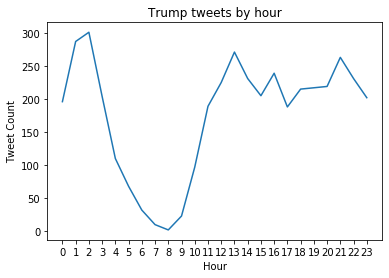

In [14]:
# Initialize hourly_counts as above
hourly_counts = {hour:0 for hour in range(24)}
print(hourly_counts)

for tweet in tweet_data:
    date_str = tweet['created_at']
    dt = datetime.strptime(date_str,'%a %b %d %H:%M:%S +0000 %Y')
    hourly_counts[dt.hour] += 1
                
print(hourly_counts)

import matplotlib.pyplot as plt

x_values = list(hourly_counts.keys())
y_values = list(hourly_counts.values())
x_pos = x_values
plt.plot(x_values, y_values)
plt.xticks(x_pos, x_values)
plt.ylabel('Tweet Count')
plt.xlabel('Hour')
plt.title('Trump tweets by hour')
plt.show()

What is the most common hour for tweeting is 2, 13 and 21.
We can say that the President's sleeping patterns are from 5 to 9.

You can use the `matplotlib` library to plot the result. You can do a line chart following [the first example here](https://matplotlib.org/users/pyplot_tutorial.html), or a bar chart following [this example](https://pythonspot.com/en/matplotlib-bar-chart/). 

You could also check how this pattern changes over different months.

### Who's tweeting?

It appears that there are different sources for the tweets in the `source` field of the data. 

Create an hourly count of tweets by the different sources. Can you infer what this suggests about Trump's personal phone and the one his office uses for tweeting?

Let's first find all the sources that are in the data. 

In [16]:
sources = set()
for tweet in tweet_data:
    if tweet['source'] not in sources:
        sources.add(tweet['source'])   
print(sources)

{'Periscope', 'Twitter for iPhone', 'TweetDeck', 'Media Studio', 'Twitter Web Client', 'Mobile Web (M5)', 'Twitter Ads', 'Twitter for iPad', 'Twitter for Android', 'Instagram'}


Which are the most common sources and what do their timings suggest about usage?

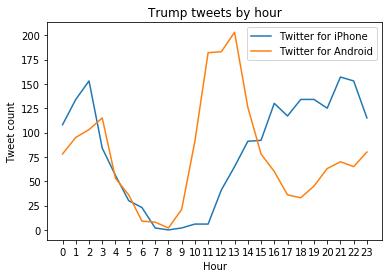

In [21]:
# Initialize dictionary (or multiple) like above
# Loop through tweets and add to counts like above
tweets_by_source = {src: {hour:0 for hour in range(24)} for src in sources}
tweets_by_source['Twitter for iPhone']

for tweet in tweet_data:
    # Your code here
    src = tweet['source']
    date_str = tweet['created_at']
    dt = datetime.strptime(date_str,'%a %b %d %H:%M:%S +0000 %Y')
    tweets_by_source[src][dt.hour] += 1
    
sources_to_plot = ['Twitter for iPhone', 'Twitter for Android']
for src in sources_to_plot:
    x_values = list(tweets_by_source[src].keys())
    y_values = list(tweets_by_source[src].values())
    x_pos = x_values

    plt.plot(x_pos, y_values)
    plt.xticks(x_pos, x_values)
    plt.ylabel('Tweet count')
    plt.xlabel('Hour')
    plt.title('Trump tweets by hour')
    plt.legend(sources_to_plot)
 
plt.show()

### Who's tweeting what?

How do the contents of Mr Trump's tweets change depending on the source? We could do some really sophisticated analysis here through [sentiment analysis](http://text-processing.com/demo/sentiment/) of the tweet texts. For the purposes of this exercise, do the following calculations by tweet source:

1. Find the fraction of tweets containing the word 'dumb' in either upper or lower case.

2. Repeat for words you'd like, for example the ones suggested below.

You can also repeat the analysis by source and hour, or look at different words or mentions of different Twitter users. 

Note you probably want to count both upper and lower case words together.


In [23]:
words = ['dumb', 'brexit', '#makeamericagreatagain', 'guns', 'dead', '#crookedhillary']

word_counts = {word:{src:0 for src in sources} for word in words}
tweet_counts = {src:0 for src in sources}


for tweet in tweet_data:
    src = tweet['source']
    tw_text = tweet['text']
    for word in words:
        if word in tw_text.lower():
            word_counts[word][src] +=1
    tweet_counts[src] +=1

print('"Dumb" fractions')
print({src:word_counts['dumb'][src]/tweet_counts[src] for src in word_counts['dumb']})

"Dumb" fractions
{'Periscope': 0.0, 'Twitter for iPhone': 0.0030643513789581204, 'TweetDeck': 0.0, 'Media Studio': 0.0, 'Twitter Web Client': 0.0029411764705882353, 'Mobile Web (M5)': 0.0, 'Twitter Ads': 0.0, 'Twitter for iPad': 0.045454545454545456, 'Twitter for Android': 0.008174386920980926, 'Instagram': 0.0}


## Section 2
## Repeat with the Mexican President